In [1]:
# === CONFIG + MODULE IMPORTS ===

# Load environment variables from .env
from dotenv import load_dotenv
load_dotenv()

# Add the modules directory to Python’s import path
import sys
import os
sys.path.append(os.path.abspath("../modules"))

# Standard imports
import pandas as pd

# Import module functions
from jira_api import get_cycle_time_issues
from metrics_calculations import parse_cycle_time_issues

from visualizations import (
    plot_cycle_time_trend,
    plot_cycle_time_trend_exclude_extremes,
    plot_cycle_time_distribution,
    plot_cycle_time_heatmap_by_assignee
)

# Configurable toggles
PROJECT_KEY = "ITSEC"          # Change to your desired Jira project
THRESHOLD_DAYS = 180           # Cycle time threshold for excluding outliers
MONTHS_LOOKBACK = 6            # Lookback window in months


In [2]:
# === FETCH & PARSE ISSUES ===
issues = get_cycle_time_issues(PROJECT_KEY, months=MONTHS_LOOKBACK)
df = parse_cycle_time_issues(issues)

df["Month"] = df["resolved"].dt.tz_convert(None).dt.to_period("M")

print(f"Issues retrieved: {len(df)}")


Issues retrieved: 22


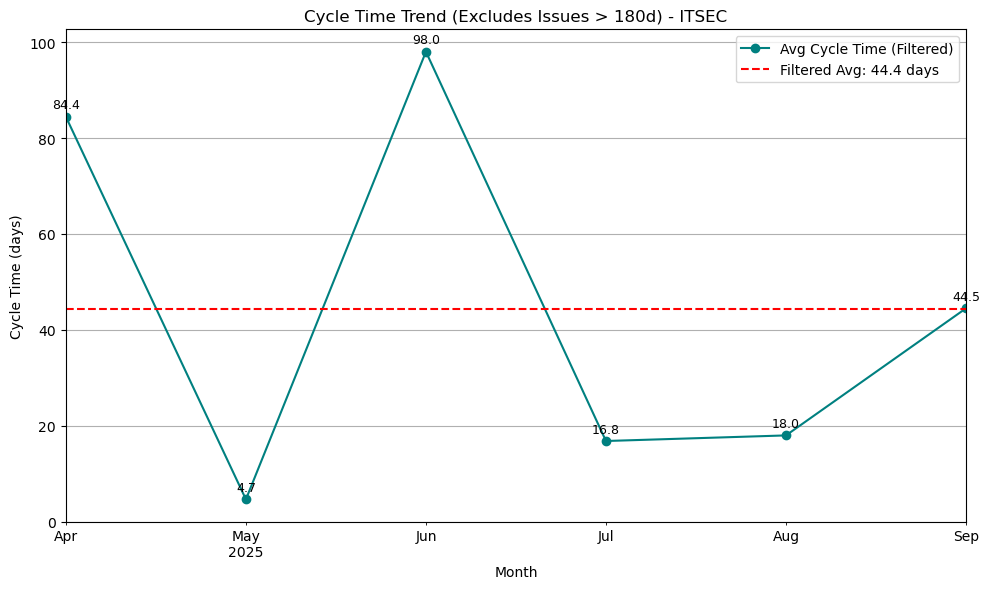


📊 Monthly Averages (Excludes Outliers):


,Month,Avg Cycle Time (Filtered)
0,2025-04,84.4
1,2025-05,4.7
2,2025-06,98.0
3,2025-07,16.8
4,2025-08,18.0
5,2025-09,44.5



⚠️ Excluded Issues (Cycle Time > 180 days):


,key,summary,parent_summary,assignee,in_progress,resolved,cycle_time_days
3,ITSEC-3604,Create Checklist for GSK Gap Analysis,GSK Gap Remediation Discovery and 2024Q4 Scoping,Tony Thiry,2024-11-15 15:03:57.505000+00:00,2025-07-30 19:51:37.040000+00:00,257
4,ITSEC-3600,Select Training and Configure Campaign for IT ...,Cybersecurity Training: Discovery/KnowBe4 Cont...,Tony Thiry,2024-11-20 13:33:25.664000+00:00,2025-07-30 19:35:39.790000+00:00,252


In [3]:
# === Cycle Time Trend (Excludes Extreme Outliers) ===
plot_cycle_time_trend_exclude_extremes(df, PROJECT_KEY, THRESHOLD_DAYS)


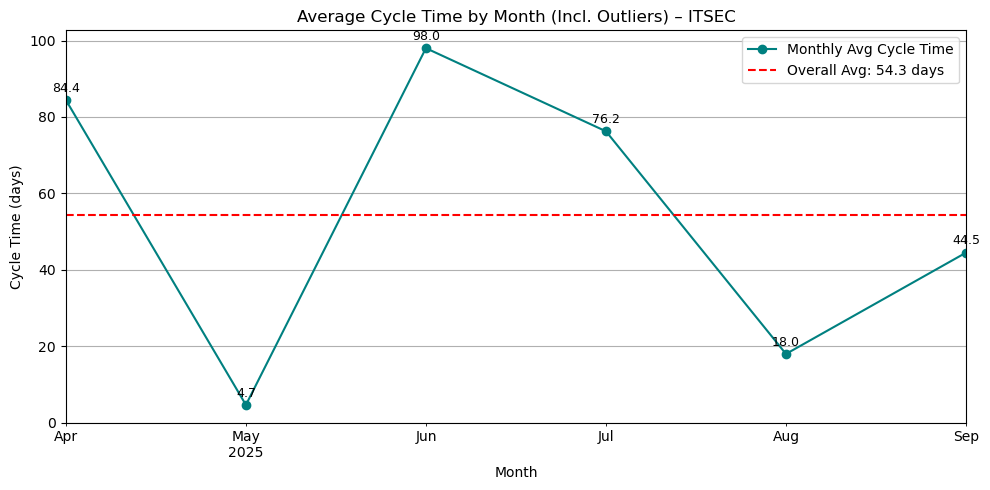


📊 Monthly Cycle Time Averages (Includes Outliers):


,Month,Avg Cycle Time (All Issues)
0,2025-04,84.4
1,2025-05,4.7
2,2025-06,98.0
3,2025-07,76.2
4,2025-08,18.0
5,2025-09,44.5


In [4]:
# === Full Cycle Time Trend (Raw) ===
plot_cycle_time_trend(df, PROJECT_KEY)


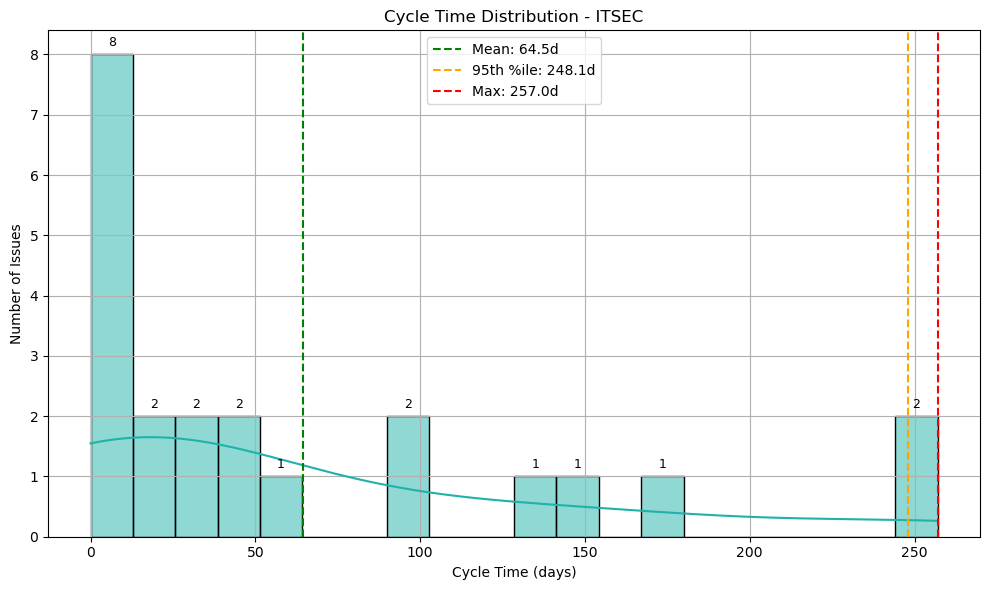

In [5]:
# === CYCLE TIME DISTRIBUTION CHART ===
plot_cycle_time_distribution(df, PROJECT_KEY)


In [6]:
# === DEBUG SECTION (Optional, Commented Out) ===

# Quick preview of structure
# display(df.head())

# See data types of parsed fields
# print(df.dtypes)

# Full issue table with resolution and in progress dates - optional deep dive
# import pandas as pd
# pd.set_option("display.max_rows", None)
# sorted_df = df.sort_values(by="cycle_time_days", ascending=False)
# display(sorted_df[[
#     "key", "summary", "parent_summary",
#     "assignee", "in_progress", "resolved", "cycle_time_days"
# ]])


In [7]:
# === CYCLE TIME BY ASSIGNEE (Optional) ===
# Uncomment the line below when needed (e.g., 1:1, analysis, deep dive)

# plot_cycle_time_heatmap_by_assignee(df, PROJECT_KEY)
